In [5]:
import sys 
sys.path.append('/home/bgu9/Fall_Detection_KD_Multimodal/')

In [6]:
import torch
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
'''
Configuration
'''
train_subjects = [5,7,10,11,15,16,17,18,19]
test_subjects = [21,22,23]
batch_size = 8
config = {
    'num_heads' : 2,
    'num_layers' : 2,
    'norm_first' : True,
    'embed_dim': 8,
    'activation': 'relu',
    'input_dim': 3,
    'num_classes': 8,
    'acc_frames' : 128,
    'mocap_frames' : 128
}


In [8]:
'''
Dataset Preparation
'''
from utils.dataprocessing import sf_processing, normalization

dataset = sf_processing(data_dir = '/home/bgu9/Fall_Detection_KD_Multimodal/data/smartfallmm',
                        subjects = test_subjects,
                        acc_window_size=config['acc_frames'],
                        skl_window_size=config['mocap_frames'],
                        num_windows=20)
norm_data, acc_scaler, skl_scaler =  normalization(data=dataset, mode = 'fit')

file paths 553
(52, 128, 3)


In [9]:
device = ('cuda:3' if torch.cuda.is_available() else 'cpu')
model = torch.load('/home/bgu9/Fall_Detection_KD_Multimodal/exps/smartfall_har/student/right_implementation_test/ttfstudent.pth')
model.to(device)


TransModel(
  (input_proj): Linear(in_features=3, out_features=8, bias=True)
  (encoder_layer): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): _LinearWithBias(in_features=8, out_features=8, bias=True)
    )
    (linear1): Linear(in_features=8, out_features=32, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
    (linear2): Linear(in_features=32, out_features=8, bias=True)
    (norm1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
    (dropout1): Dropout(p=0.5, inplace=False)
    (dropout2): Dropout(p=0.5, inplace=False)
  )
  (encoder): TransformerEncoderWAttention(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): _LinearWithBias(in_features=8, out_features=8, bias=True)
        )
        (linear1): Linear(in_features=8, out_features=32, bias=True)
        (dropout): Dropout(p=0.5, inplace=False)
     

In [10]:
from Feeder.Make_Dataset import UTD_mm
from torch.utils.data import DataLoader

In [13]:
def plot_attention_map(attention_weights, layer_idx):
    attn = attention_weights[layer_idx][7, :, :].detach().cpu().numpy()
    sns.heatmap(attn, cmap='viridis')
    plt.title(f'Attention Map - Layer {layer_idx + 1}')
    plt.xlabel('Key Positions')
    plt.ylabel('Query Positions')
    plt.show()

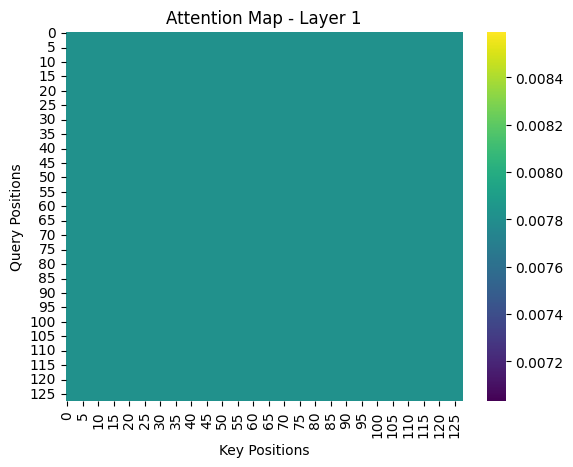

In [14]:
feeder = UTD_mm(dataset= norm_data, batch_size=batch_size)
loader = DataLoader(dataset=feeder, batch_size=batch_size)
for batch_idx, (inputs, targets, idx) in enumerate(loader):
    acc_data = inputs['acc_data'].cuda(3)
    skl_data = inputs['skl_data'].cuda(3)
    labels = targets.cuda(3)
    output = model(acc_data, skl_data)
    layer_name = 'encoder'
    encoder_layer = getattr(model, layer_name)
    if batch_idx == 1:
        plot_attention_map(encoder_layer.attention_weights, 0)
        

In [42]:


output = model(acc_data, skl_data)
layer_name = 'encoder'
encoder_layer = getattr(model, layer_name)
print(encoder_layer.attention_weights[1].shape)

TypeError: linear(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [26]:
for name, module in model.named_modules():
    print(name)




input_proj
input_proj.0
input_proj.1
input_proj.2
input_proj.3
input_proj.4
input_proj.5
input_proj.6
input_proj.7
transform_layer
encoder_layer
encoder_layer.self_attn
encoder_layer.self_attn.out_proj
encoder_layer.linear1
encoder_layer.dropout
encoder_layer.linear2
encoder_layer.norm1
encoder_layer.norm2
encoder_layer.dropout1
encoder_layer.dropout2
encoder
encoder.layers
encoder.layers.0
encoder.layers.0.self_attn
encoder.layers.0.self_attn.out_proj
encoder.layers.0.linear1
encoder.layers.0.dropout
encoder.layers.0.linear2
encoder.layers.0.norm1
encoder.layers.0.norm2
encoder.layers.0.dropout1
encoder.layers.0.dropout2
encoder.layers.1
encoder.layers.1.self_attn
encoder.layers.1.self_attn.out_proj
encoder.layers.1.linear1
encoder.layers.1.dropout
encoder.layers.1.linear2
encoder.layers.1.norm1
encoder.layers.1.norm2
encoder.layers.1.dropout1
encoder.layers.1.dropout2
encoder.norm
reduciton
reduciton.0
reduciton.1
feature_transform
ln1
output
